### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Week 1: Linear regression using Python
>***The marketing department of Turtle Games wants to better understand how users accumulate loyalty points. The objective of this section is to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores with data analysis of socia media data using Python.***

## 1. Load and explore the data

In [1]:
# Import necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm 
import nltk 
import os 

from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from scipy.stats import norm

nltk.download('punkt')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mimis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Import and read the data file
df_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame
df_reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# View the DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Validate missing values
df_reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

>***Observation:***<br>
No missing values found

In [5]:
# Descriptive statistics
df_reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop language and platform columns

In [6]:
# Drop unnecessary columns language and platform
df_reviews.drop(labels=['language', 'platform'], axis=1, inplace=True)

# View column names
df_reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename remuneration and spending_score columns

In [7]:
# Rename the column headers
df_reviews = df_reviews.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"})

# View new column names
df_reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output
df_reviews.to_csv("cleaned_turtle_reviews.csv", index=False)

In [9]:
# Import new CSV file with Pandas
turtle_reviews = pd.read_csv("cleaned_turtle_reviews.csv")

# View DataFrame
turtle_reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [10]:
# Check duplicates
turtle_reviews.duplicated().sum()

0

In [11]:
# Explore the shape
turtle_reviews.shape

(2000, 9)

In [12]:
# View the info
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


>***Observations:***<br>
Variables spending_score, remuneration, age and loyalty_points are continuous numeric types so they are suitable for Linear regression

## 5. Linear regression

### 5a) spending_score vs loyalty_points

Text(0, 0.5, 'Loyalty points')

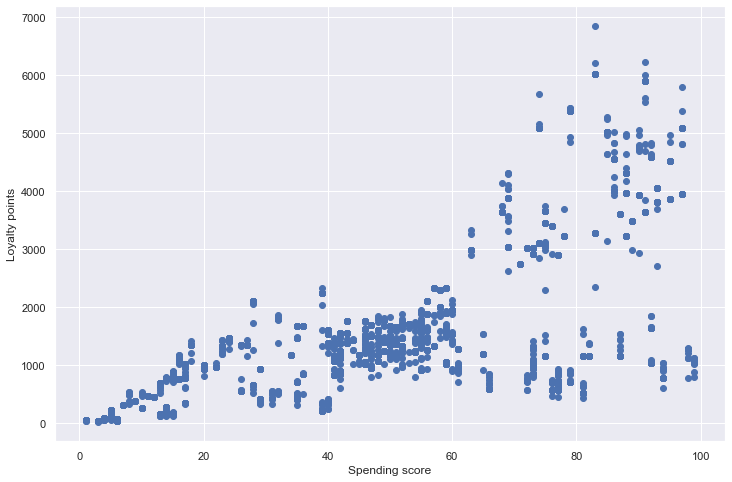

In [13]:
# Independent variable
x = turtle_reviews['spending_score'] 

# Dependent variable
y = turtle_reviews['loyalty_points'] 

# Check for linearity
plt.scatter(x, y) 

# Set labels
plt.xlabel("Spending score")
plt.ylabel("Loyalty points")

In [14]:
# Create formula and pass through OLS model
f = 'y ~ x'

# OLS model
test = ols(f, data = turtle_reviews).fit()

# Print the regression table
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        22:58:24   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>***Observations:***<br>
There is a positive relationship between spending scores and loyalty points.<br>
Adjusted R_squared: 0.452 meaning around 45% of the observed variation (loyalty_points) can be explained by the model's input (spending_score).<br>
x- coeficient 33.0617: The loyalty points will change by 33 if the spending scores change by 1.<br>
Probability of the t-test is 0 so the estimated slope is significant.

In [15]:
# pd_rsquared DataFrame
pd_rsquared = pd.DataFrame({'Independent variable': ['spending score'], 'Percentage': [45.2]})

# View the dataframe
pd_rsquared.head()

Independent variable  Percentage
0       spending score        45.2

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


>***Observations:***<br>
Y intercept is -75.052663. <br>
x cooeficient is 33.06.<br>

In [17]:
# Set the the x coefficient to 33.061693 and the constant to -75.052663 to generate the regression table.
y_pred = 33.061693 * turtle_reviews['spending_score'] -75.052663

# View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

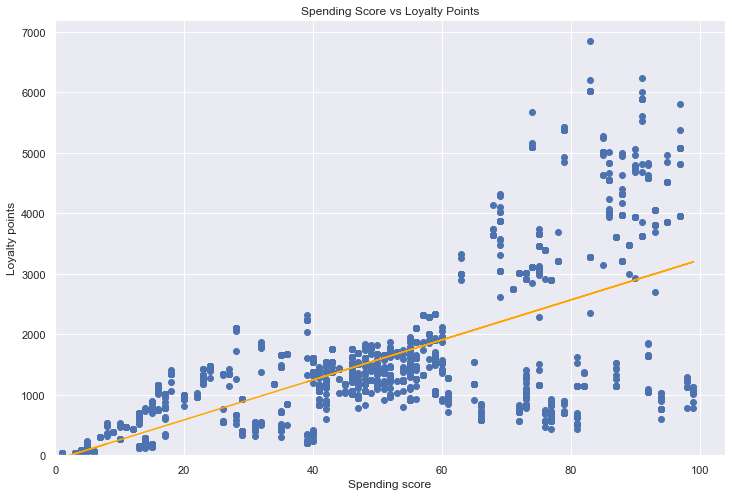

In [18]:
# Plot the data points with a regression line
plt.scatter(x,y)  

# Plot the regression line (in orange)
plt.plot(x,y_pred, color='orange') 

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph.  
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending score")
plt.ylabel("Loyalty points") 

plt.show()

>***Observations:***<br>
The linear regression uses 2000 revews, the complete data sets. The line fits loosely among the data points. <br>
A further analysis of using subsets of training and test data are recommended to make more accurate predictions.<br>
This linear regression shows underfitting.

### 5b) remuneration vs loyalty_points

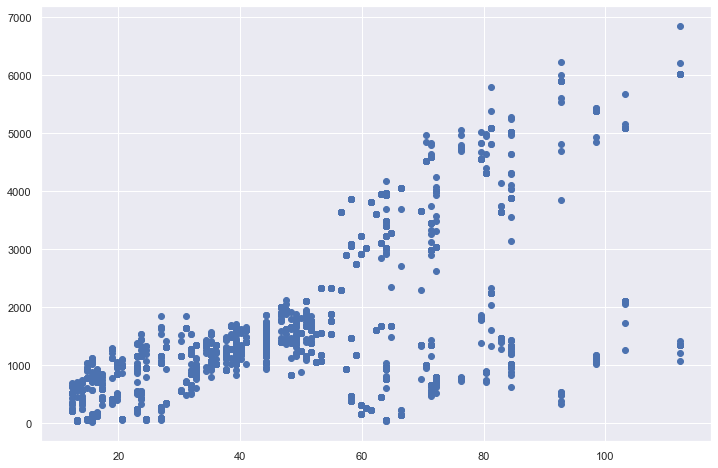

In [19]:
# Independent variable
x = turtle_reviews['remuneration'] 

# Dependent variable
y = turtle_reviews['loyalty_points'] 

# Check for linearity
plt.scatter(x, y) 

In [20]:
# Create formula and pass through OLS model
f = 'y ~ x'

# OLS model
test = ols(f, data = turtle_reviews).fit()

# Print the regression table
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        22:58:24   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>***Observations:***<br>
There is a positive relationship between remuneration and loyalty points.<br>
R_squared: 0.380 meaning around 38% of the observed variation (loyalty_points) can be explained by the model's input (remuneration).<br>
x- coeficient 34.1878: The remuneration will increase by 34 if the loyalty point increases by 1.<br>
Probability of the t-test is 0 so the estimated slope is significant.

In [21]:
# pd_rsquared DataFrame
pd_rsquared = pd_rsquared.append({"Independent variable": "remuneration", "Percentage": 38}, ignore_index=True)

# View the dataframe
pd_rsquared.head()

Independent variable  Percentage
0       spending score        45.2
1         remuneration        38.0

>***Observations:***<br>
R_squared: 0.380 meaning around 38% of the observed variation (loyalty_points) can be explained by the model's input (remuneration).

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [23]:
# Set the the x coefficient to 34.187825 and the constant to -65.686513 to generate the regression table.
y_pred = 34.187825 * turtle_reviews['remuneration'] -65.686513

# View the output
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

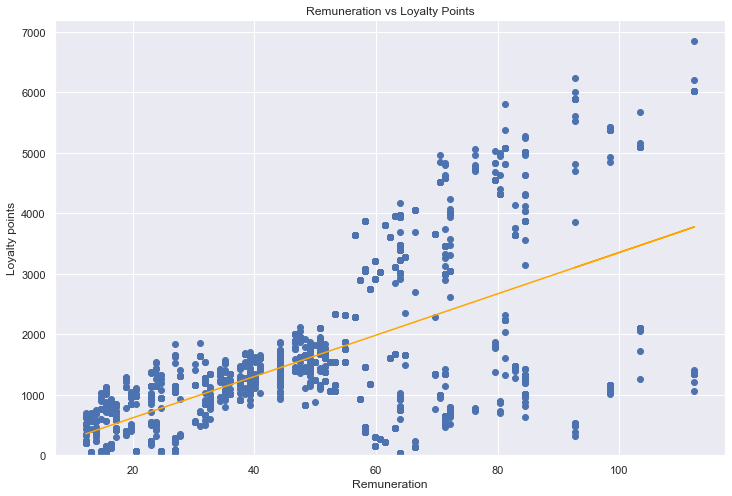

In [24]:
# Plot the data points with a regression line
plt.scatter(x,y)  

# Plot the regression line (in orange)
plt.plot(x,y_pred, color='orange') 

# Set the y limit on the axis
plt.ylim(0)

# Set the title and legends for the graph.  
plt.title("Remuneration vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty points")

plt.show()

>***Observations:***<br>
The linear regression uses 2000 revews, the complete data sets. The line fits loosely among the data points. <br>
A further analysis of using subsets of training and test data are recommended to make more accurate predictions.<br>
This linear regression shows underfitting even though there is a positive relationship between remuneration and loyalty points.

### 5c) age vs loyalty_points

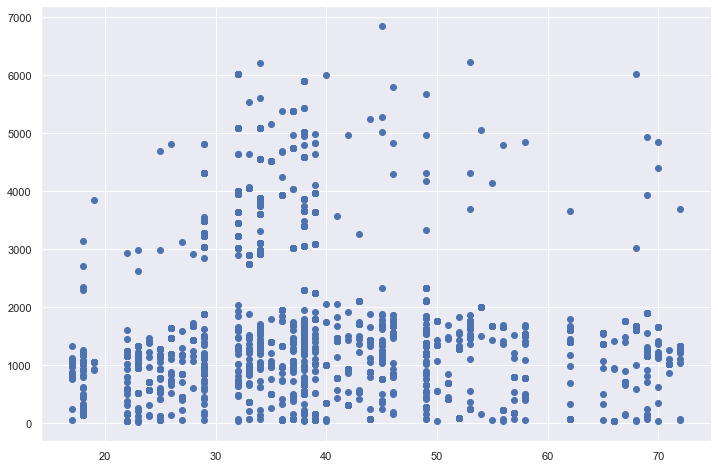

In [25]:
# Independent variable
x = turtle_reviews['age'] 

# Dependent variable
y = turtle_reviews['loyalty_points'] 

# Check for linearity
plt.scatter(x, y) 

In [26]:
# Create formula and pass through OLS model
f = 'y ~ x'

# OLS model
test = ols(f, data = turtle_reviews).fit()

# Print the regression table
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 04 Sep 2022   Prob (F-statistic):             0.0577
Time:                        22:58:24   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>***Observations:***<br>
There is no relationship between age and loyalty points.<br>
R_squared: 0.002 meaning around 0.2% of the observed variation (loyalty_points) can be explained by the model's input (age).<br>
Probability of the t-test is 0.58 meaning the estimated slope is insignificant.

In [27]:
# append a new row
pd_rsquared = pd_rsquared.append({"Independent variable": "age", "Percentage": 0.2}, ignore_index=True)

# View the dataframe
pd_rsquared.head()

Independent variable  Percentage
0       spending score        45.2
1         remuneration        38.0
2                  age         0.2

In [28]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [29]:
# Set the the x coefficient to -4.012805 and the constant to +1736.517739 to generate the regression table.
y_pred = -4.012805 * turtle_reviews['age'] + 1736.517739

# View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

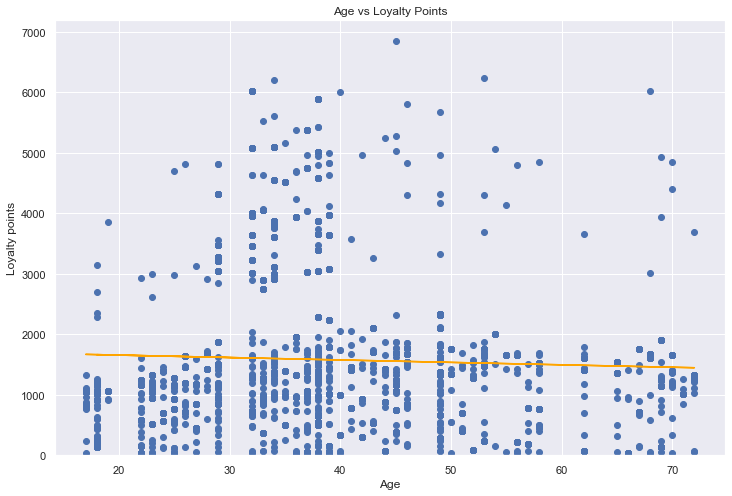

In [30]:
# Plot the data points with a regression line
plt.scatter(x,y)  

# Plot the regression line (in orange)
plt.plot(x,y_pred, color='orange') 

# Set the y limit on the axis
plt.ylim(0)

# Set the title and legends for the graph.  
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty points")

plt.show()

>***Observations:***<br>
There is no relationship between age and loyalty points.

## Bar barchart to show the percentage of independent variables

Text(0.5, 1.0, 'R squared % vs Independent Variable')

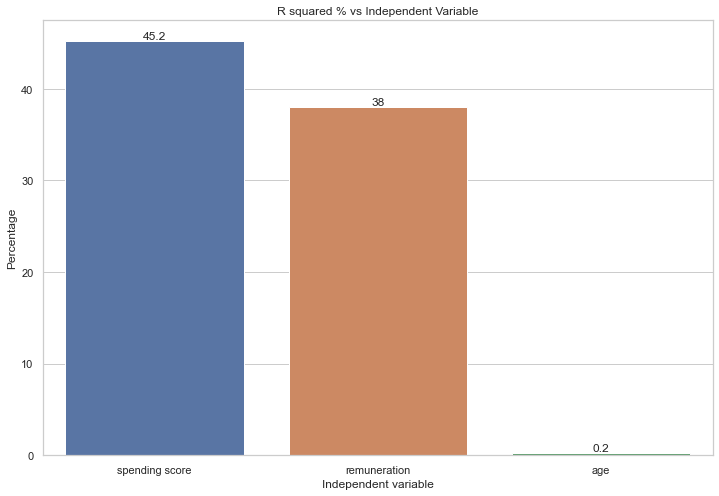

In [31]:
# Plot barchart r squared of independent variables
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Independent variable", y="Percentage", data=pd_rsquared)
ax.bar_label(ax.containers[0])
plt.title("R squared % vs Independent Variable")

## 6. Observations and insights

Using 2000 reviews data points for investigating the relationships of loyalty points, spending scores, remuneration and age.<br>
There are positive relationships between spending scores and loyalty points, and remuneration and loyalty points.<br>
The lines fit loosely in both models. This highlights underfitting of the models because of using population of 2000 reviews.<br>
To achieve more accurate predictions, further analysis with these variables are recommended using subsets of test and traning data.<br>
Multiple regression could then be applied using these variables to gain more insights among loyalty points, remuneration and spending scores.

There is no relationship found between age and loyalty points.

# Week 2: Clustering with *k*-means using Python

The marketing department wants to better understand the usefulness of renumeration and spending scores. To identify groups within the customer base that can be used to target specific market segments, I use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [32]:
# Load the cleaned_turtle_reviews.csv file as df2
df = pd.read_csv("cleaned_turtle_reviews.csv")

# View DataFrame
df.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [33]:
# Drop unnecessary columns
df_review = df.drop(columns=['age', 'loyalty_points', 'education', 'product', 'review','summary'])

# View DataFrame
df_review.head()

gender  remuneration  spending_score
0    Male         12.30              39
1    Male         12.30              81
2  Female         13.12               6
3  Female         13.12              77
4  Female         13.94              40

In [34]:
# Explore the data
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   remuneration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


>***Observations:***<br>
Variables remuneration and spending_score are continuous numeric data types, gender is categorial

In [35]:
# Descriptive statistics
df_review.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

Text(0.5, 1.0, 'Remuneration vs Spending Score by Gender')

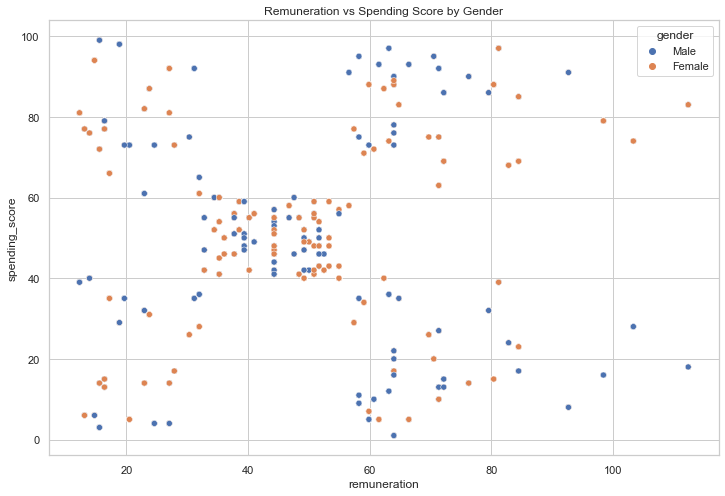

In [36]:
# Create a scatterplot with Seaborn
sns.scatterplot(x='remuneration', y='spending_score',
                data=df_review, hue='gender')
plt.title("Remuneration vs Spending Score by Gender")

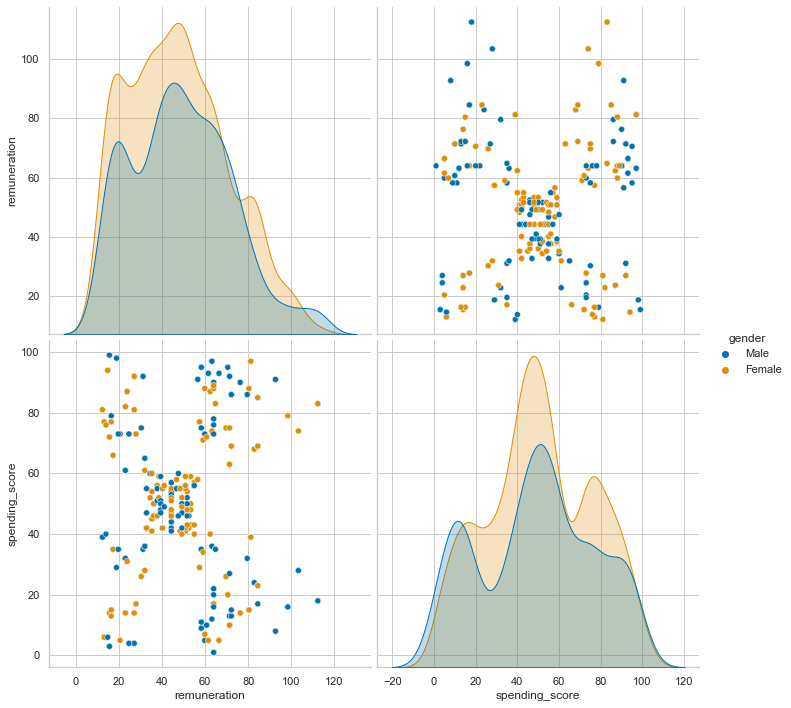

In [37]:
# Create a pairplot with Seaborn
x = df_review[['remuneration', 'spending_score']]

sns.pairplot(df_review, vars=x, palette = 'colorblind',
             hue='gender', diag_kind= 'kde', height=5)

> ***Observations:***<br>
The scatterplot shows the shape of the data derived from remuneration and spending scores.<br>
There are 5 distinct clusters on the scatterplot grouped by gender.<br>
Pairplot shows there are many overlapped data points.

## 3. Elbow and silhoutte methods

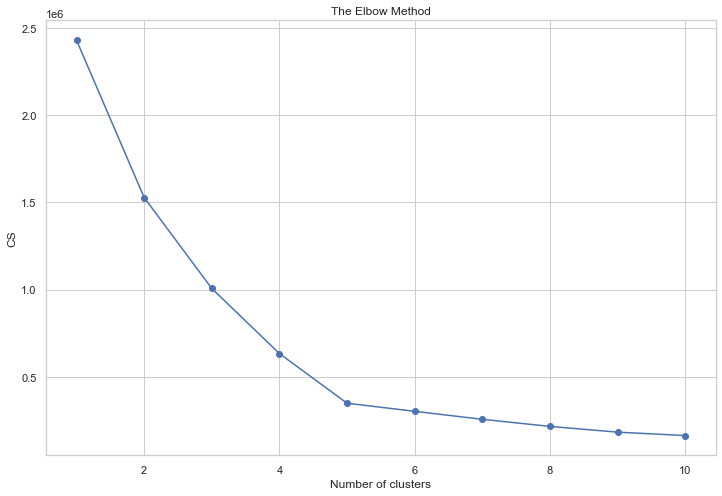

In [38]:
# Determine the number of clusters: Elbow method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

>***Observations:***<br>
From Elbow Method, the optimal number for k is 4 or 5

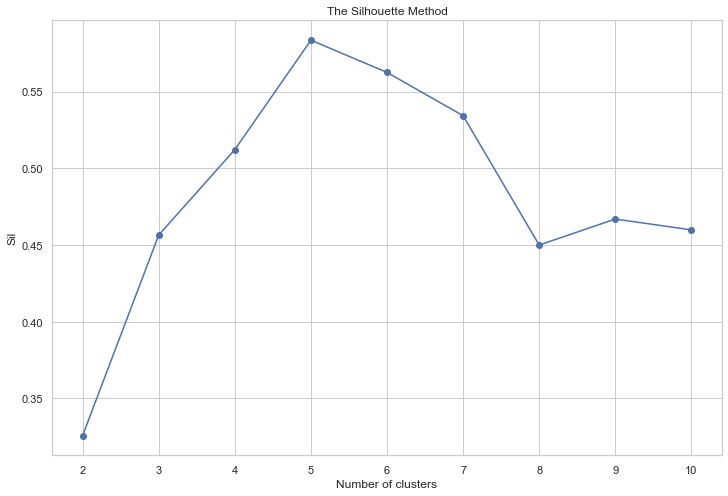

In [39]:
# Determine the number of clusters: Silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

>***Observations:***<br>
From Silhouette Method, the optimal number for k is 5.

## 4. Evaluate k-means model at different values of *k*

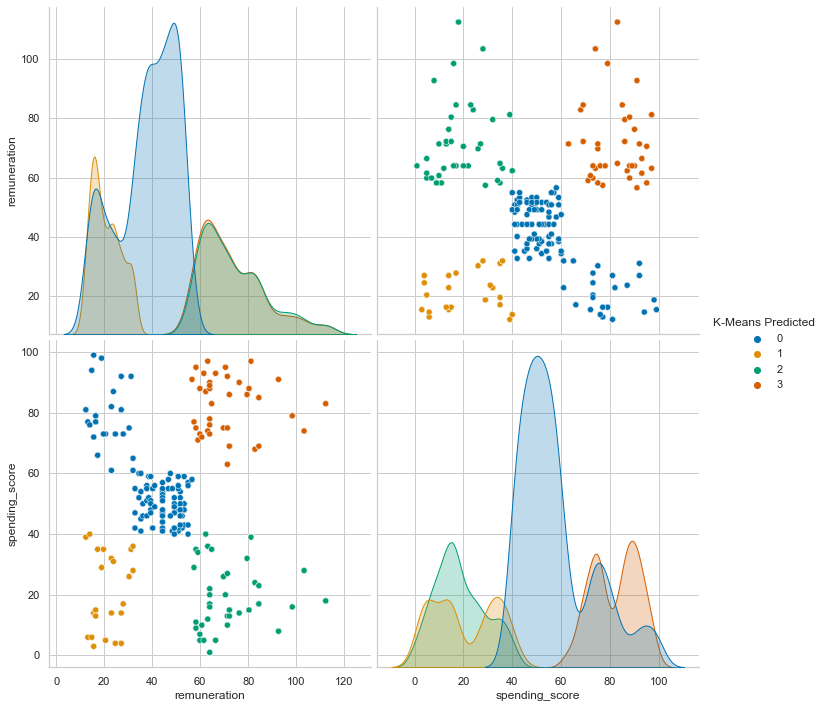

In [40]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', palette = 'colorblind', diag_kind= 'kde', height=5)

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

>***Observations:***<br>
When k-means is 4. Cluster 0 has the most data points. There are many overlapped data points.

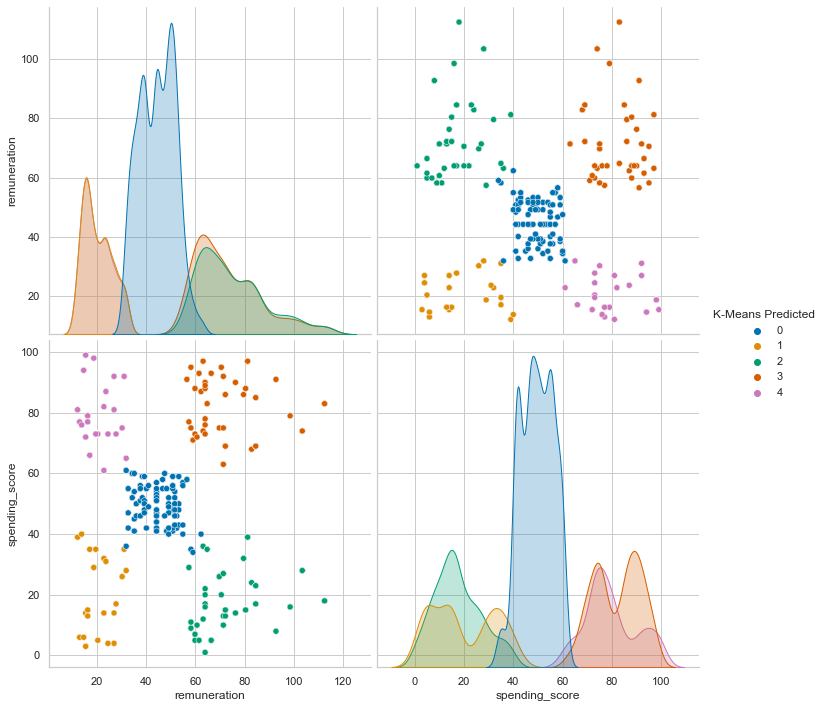

In [42]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', palette = 'colorblind', diag_kind= 'kde', height=5)


In [43]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

>***Observations:***<br>
When k-means is 5. There are 5 distinct clusters, fewer overlapped with data poiints.

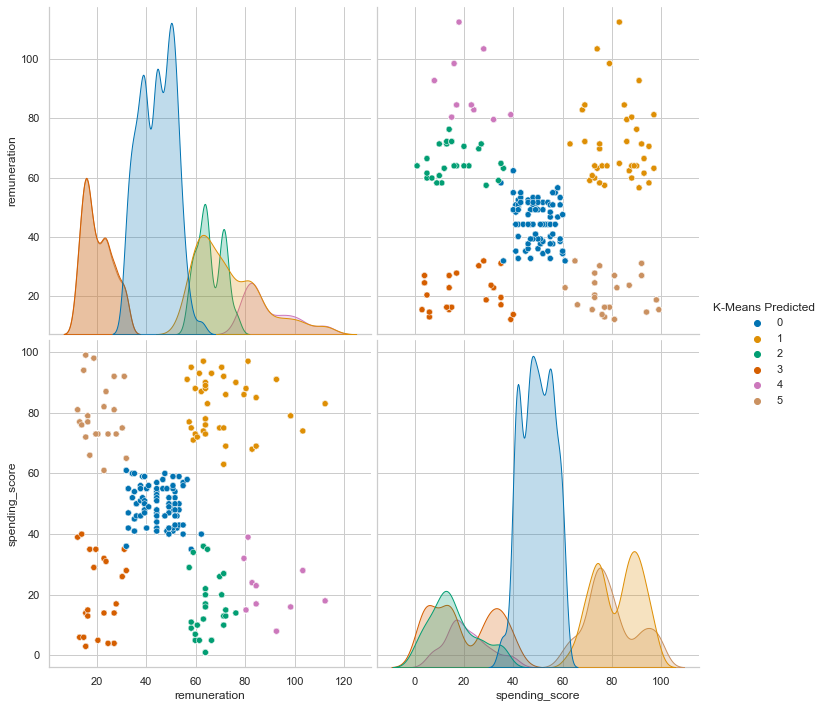

In [44]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', palette = 'colorblind', diag_kind= 'kde', height=5)

In [45]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

>***Observations:***<br>
When k-means is 6. There are some data points overlapped.

## 5. Fit final model with k-means = 5

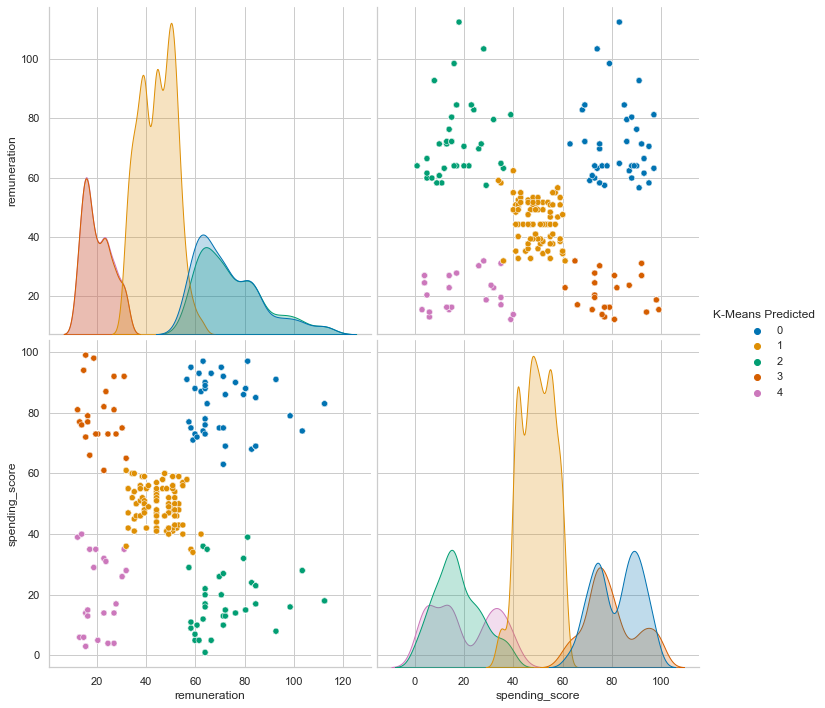

In [46]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', palette = 'colorblind', diag_kind= 'kde', height=5)

In [47]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

>***Observation:***<br>
With k-means = 5, there are 5 distinct clusters.<br>
Cluster 1 has the most data points followed by clusters 0 and 2. <br>
Cluster 1 has the least overlaps with other clusters.

In [48]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


>***Observations:***<br>
The K-Means predicted indicated that the first 5 data points allocated to clusters 3 and 4.

## 6. Plot and interpret the clusters

[Text(0.5, 1.0, 'Remuneration v Spending Score with K-Means 5')]

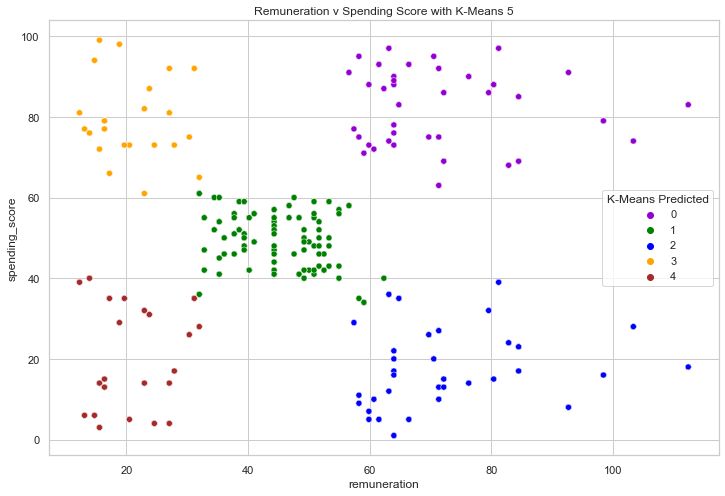

In [49]:
# Visualising the clusters.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['darkviolet', 'green', 'blue', 'orange', 'brown']).set(title = "Remuneration v Spending Score with K-Means 5")

## 7. Observations and insights

Using the k-means, the optimal number of clusters is 5. The clusters are distinct with fewer overlaps.<br>
Data points are more evenly allocated in 5 clusters.<br>

The 5 clusters explain the relationship between remuneration and spending score:<br>
    >Brown cluster has low remuneration with low spending score.<br>
    >Yellow cluster has low remuneration with higher spending score.<br>
    >Green cluster has both average remuneration and spending score. It has the hardest cluster among all clusters.<br>
    >Blue cluster has high remuneration with low spending score with some visible outliers.<br>
    >Violet cluster has high remuneration with high spending score with some visible outliers.

# Week 3: NLP using Python

The marketing department wants to identify the 15 most common words used in online product reviews and to have a list of the top 20 positive and negative reviews received from the website. Customer reviews from the website of Turtle Games is used to inform the marketing department on how to approach future campaigns. Using NLP on this data set, the objective is to analyse the sentiment of the customers' products reviews.

## 1. Load and explore the data

In [50]:
# Drop unnecessary columns. Keep 'review' and 'summary'
df_online = df_reviews.drop(columns=['gender','age', 'remuneration','spending_score','loyalty_points', 'education', 'product'])

# View DataFrame.
df_online.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [51]:
# Explore data set.
df_online.shape

(2000, 2)

>***Observation:*** <br>
There are 2000 reviews

In [52]:
# Determine if there are any missing values.
df_online.isnull().sum()

review     0
summary    0
dtype: int64

>***Obsevation:*** <br>
No missing values. 

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [53]:
# Review: Change all to lower case and join with a space.
df_online['review'] = df_online['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df_online['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [54]:
# Summary: Change all to lower case and join with a space.
df_online['summary'] = df_online['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df_online['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [55]:
# Replace all the punctuations in review column.
df_online['review'] = df_online['review'].str.replace('[^\w\s]','')

# Preview the result.
df_online['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [56]:
# Replace all the puncuations in summary column.
df_online['summary'] = df_online['summary'].str.replace('[^\w\s]','')

# Preview the result.
df_online['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [57]:
# Check the number of duplicate values
df_online.duplicated().sum()

39

In [58]:
# Drop duplicates in both columns
df_online_tokens = df_online.drop_duplicates()

# View DataFrame.
df_online_tokens.shape

(1961, 2)

>***Observations:***<br>
Duplicates are defined as same reviews and summary. 39 duplicates removed.

## 3. Tokenise and create wordclouds

In [59]:
# View DataFrame.
df_online_tokens

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [60]:
# Apply tokenisation to both columns.
df_online_tokens['review_tokens'] = df_online_tokens['review'].apply(word_tokenize)
df_online_tokens['summary_tokens'] = df_online_tokens['summary'].apply(word_tokenize)
df_online_tokens = df_online_tokens.reset_index()

# View DataFrame.
df_online_tokens

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 5 columns]

In [61]:
# Review: Create a word cloud.
textt = " ".join(review for review in df_online_tokens.review)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='cividis',
stopwords = 'none',
min_font_size = 10).generate(textt)

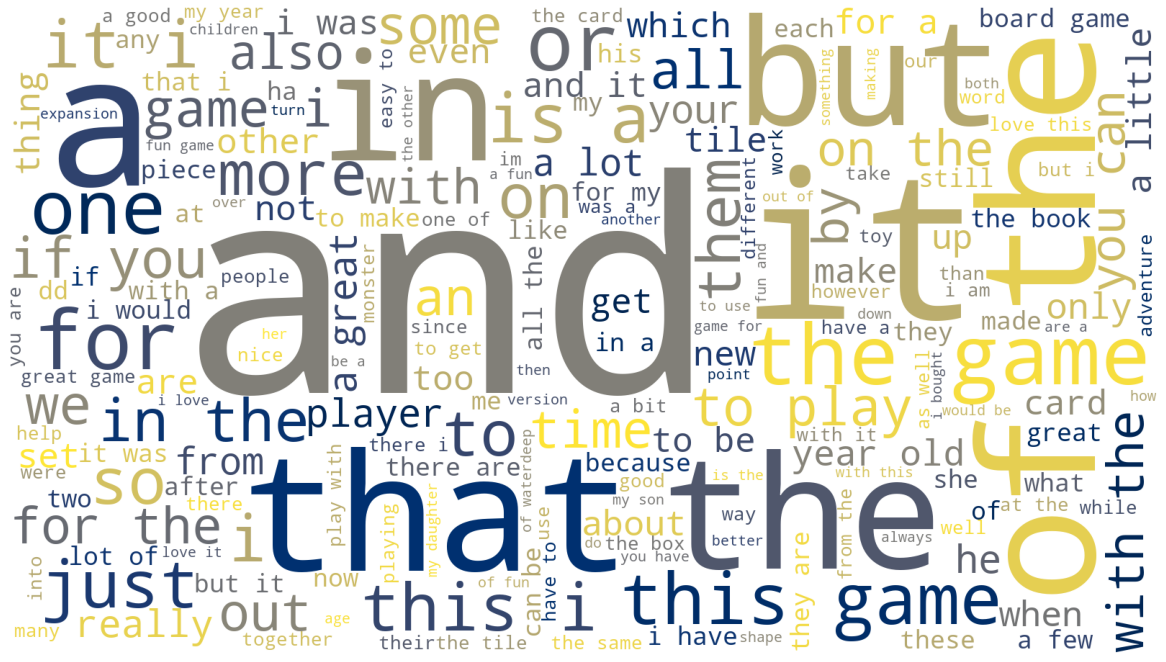

In [62]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

review_all_tokens = []
for i in range(df_online_tokens.shape[0]):
    review_all_tokens = review_all_tokens + df_online_tokens['review_tokens'][i]

>***Observations:***<br>
In review word cloud, many alphanumeric characters and stopwords dominate. There is little value for analysis.

In [63]:
# Summary: Create a word cloud.
textt = " ".join(review for review in df_online_tokens.summary)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
#colormap ='plasma',
colormap ='cividis',                     
stopwords = 'none',
min_font_size = 10).generate(textt)

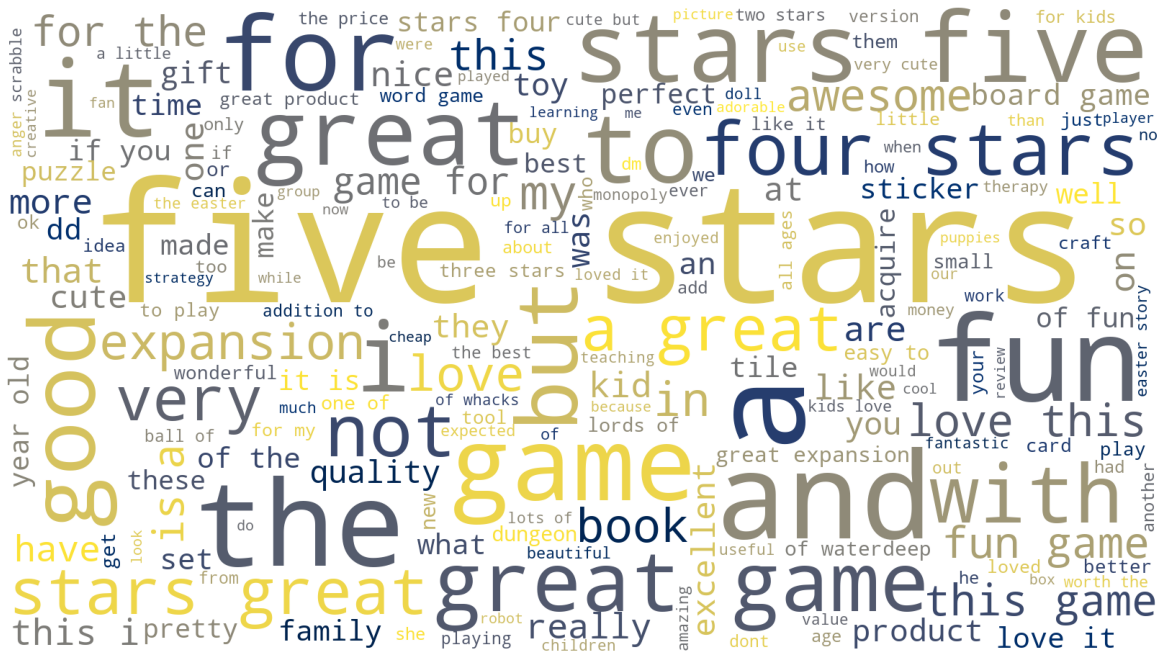

In [64]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

summary_all_tokens = []
for i in range(df_online_tokens.shape[0]):
    summary_all_tokens = summary_all_tokens + df_online_tokens['summary_tokens'][i]

>***Observations:***<br>
In summary word cloud, "five stars", "fun" and "game" stand out. The initial summary word gives a positive sentiment.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [65]:
# Review: Determine the frequency distribution.
fdist_review = FreqDist(review_all_tokens)

# Preview the data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [66]:
# Summary: Determine the frequency distribution.
fdist_summary = FreqDist(summary_all_tokens)

# Preview the data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [67]:
# Delete all the alpanum.
review_tokens = [word for word in review_all_tokens if word.isalnum()]
summary_tokens = [word for word in summary_all_tokens if word.isalnum()]

# View review tokens
review_tokens
summary_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [68]:
# Download the stop word list.
nltk.download ('stopwords')

# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mimis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Review: Create a filtered list of tokens without stop words.
review = [x for x in review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_string = ''

for value in review:
    # Add each filtered token word to the string.
    review_string = review_string + value + ' '

In [70]:
# Summary: Create a filtered list of tokens without stop words.
summary = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_string = ''

for value in summary:
    # Add each filtered token word to the string.
    summary_string = summary_string + value + ' '

### 4c) Create wordcloud without stopwords

In [71]:
# Review: Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap ='cividis',      
                min_font_size = 10).generate(review_string) 

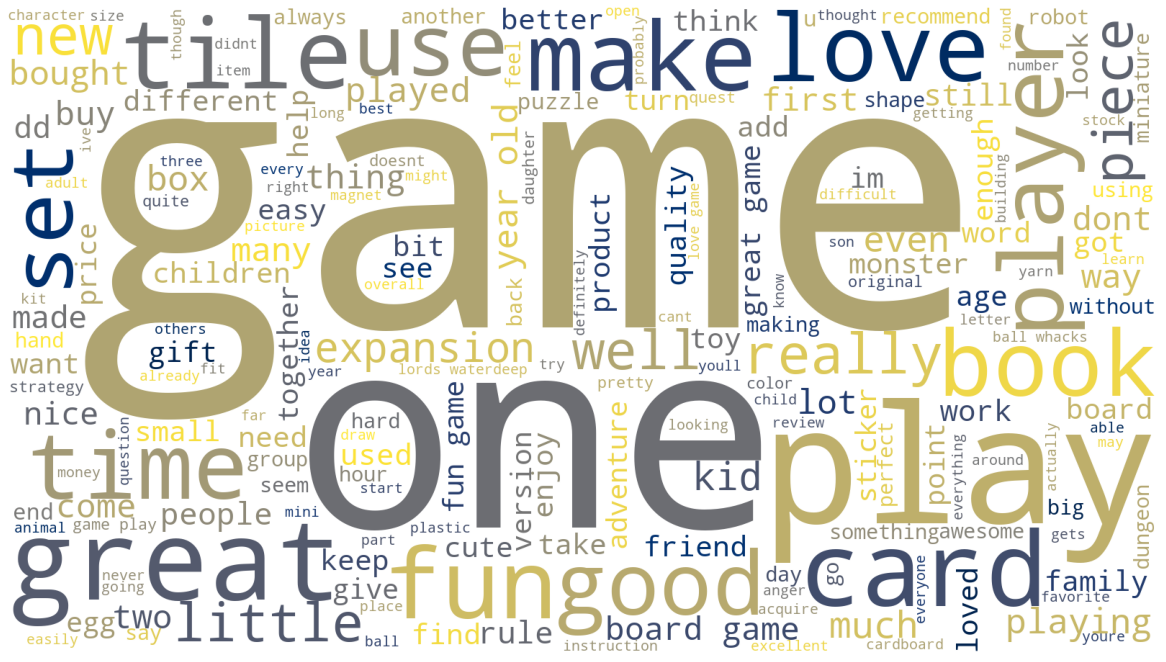

In [72]:
# Review: Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

>***Observations:***<br>
In review, the common words include “game”, “play”, “card”, “love”, “one” and “great”.

In [73]:
# Summary: Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap ='cividis', 
                min_font_size = 10).generate(summary_string) 

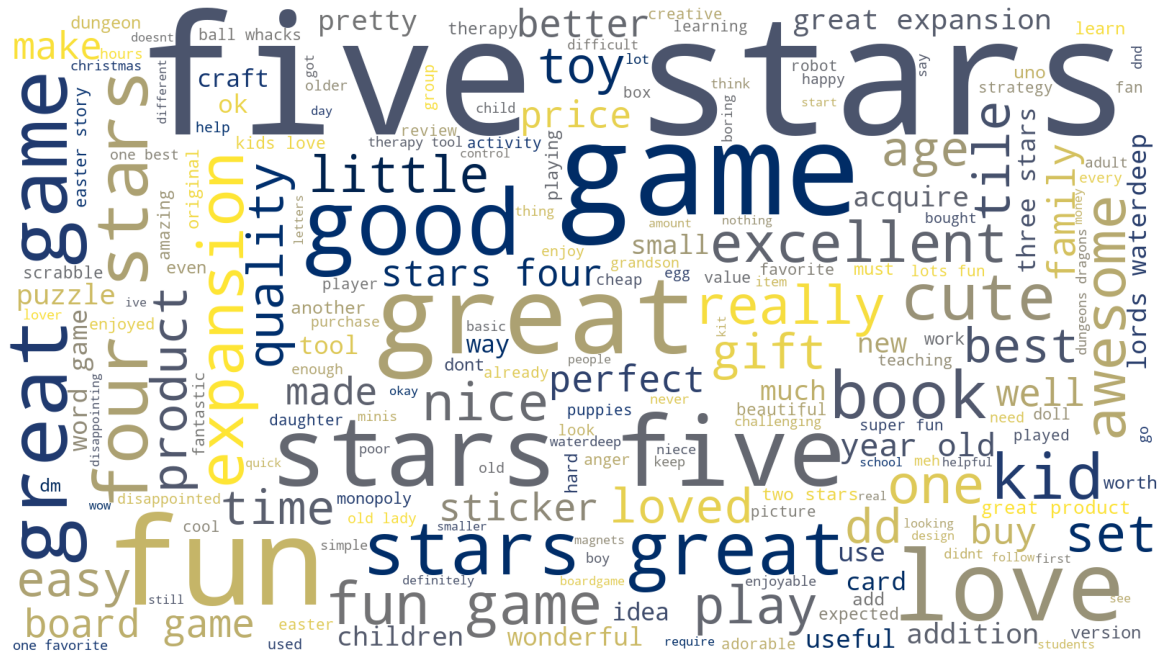

In [74]:
# Summary: Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [75]:
# Combine both review and summary string together
complete_string = ''
complete_string = review_string + ' ' + summary_string

# Review & Summary: Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap ='cividis',
                min_font_size = 10).generate(complete_string) 

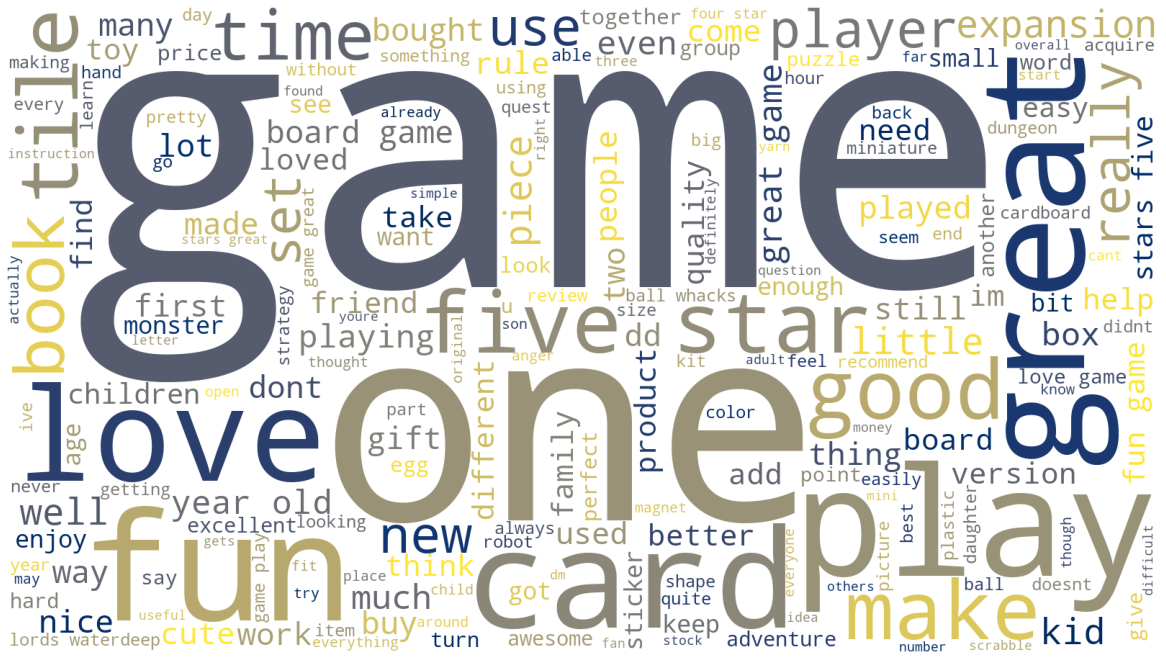

In [76]:
# Review & Summary: Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [77]:
# Review: View the frequency distribution.
fdist_review = FreqDist(review)

# Review: Preview the data.
fdist_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [78]:
# Determine the 15 most common words in Review
# Review: Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

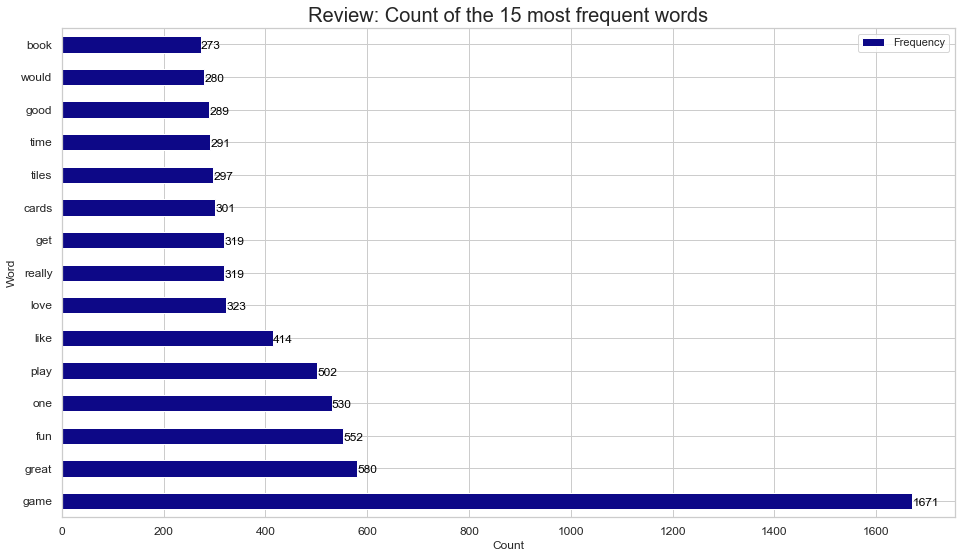

In [79]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

In [80]:
# Summary: View the frequency distribution.
fdist_summary = FreqDist(summary)

# Preview the data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [81]:
# Determine the 15 most common words in Summary
# Summary: Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

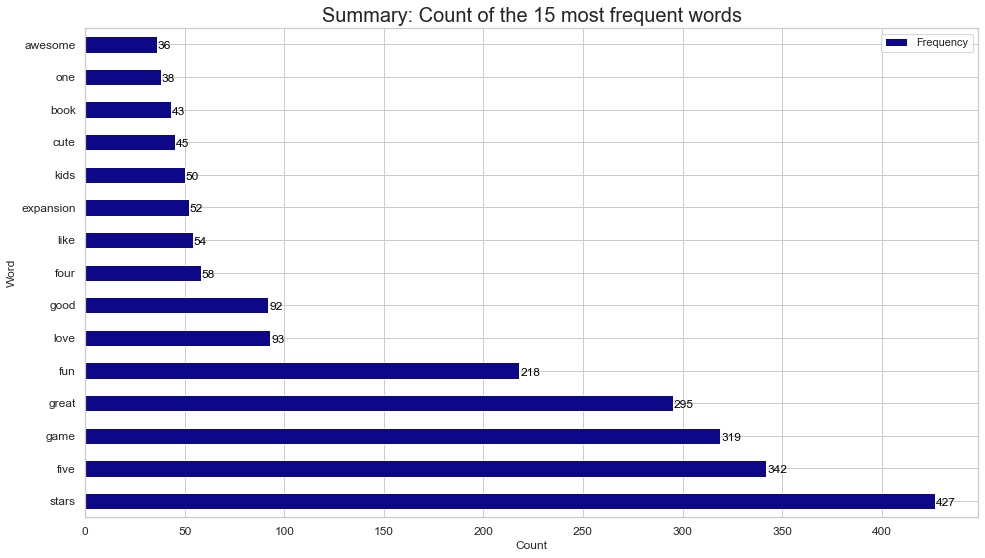

In [82]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

In [83]:
# Determine the 15 most common words in Review and Summary
review_summary = review + summary

In [84]:
# View the frequency distribution.
fdist1 = FreqDist(review_summary)

# Preview the data.
fdist1

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [85]:
# Review & Summary: Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(review_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1990
great         875
fun           770
one           568
play          528
like          468
stars         464
love          416
good          381
five          362
really        349
get           333
tiles         317
book          316
time          309

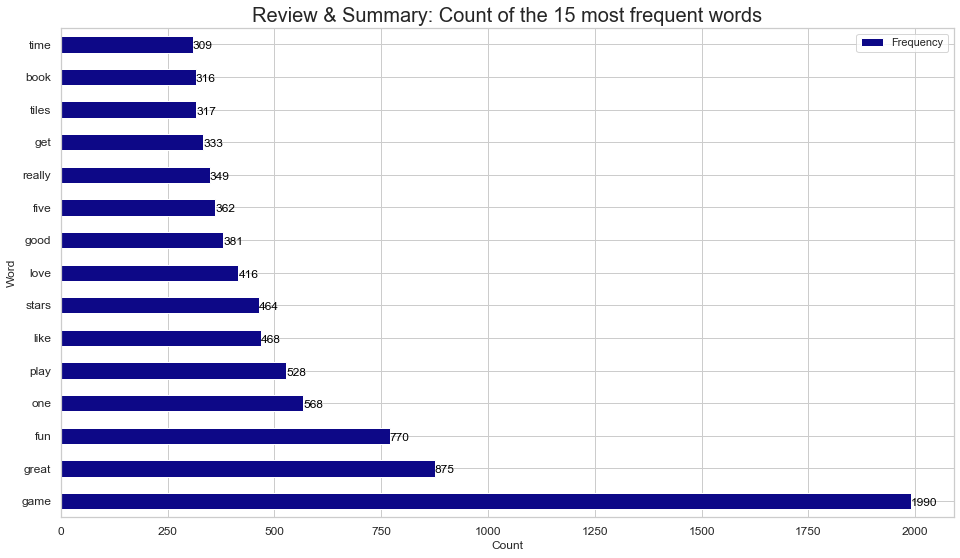

In [86]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review & Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='black')

### 4e) Identify the 15 most common words and polarity

In [87]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mimis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
darth_vader = SentimentIntensityAnalyzer()

In [89]:
# View the review_tokens DataFrame
df_online_tokens['review_tokens']

0       [when, it, comes, to, a, dms, screen, the, spa...
1       [an, open, letter, to, galeforce9, your, unpai...
2       [nice, art, nice, printing, why, two, panels, ...
3       [amazing, buy, bought, it, as, a, gift, for, o...
4       [as, my, review, of, gf9s, previous, screens, ...
                              ...                        
1956    [the, perfect, word, game, for, mixed, ages, w...
1957    [great, game, did, not, think, i, would, like,...
1958    [great, game, for, all, keeps, the, mind, nimble]
1959                                          [fun, game]
1960    [this, game, is, fun, a, lot, like, scrabble, ...
Name: review_tokens, Length: 1961, dtype: object

In [90]:
# Run the polarity score function on the string.
# This will return four values in a dictionary

review_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in df_online_tokens['review_tokens']}

In [91]:
# Convert the list of dictionary results to a pandas dataframe. 
review_polarity_pd = pd.DataFrame(review_polarity).T

# View the DataFrame.
review_polarity_pd

neg    neu    pos  \
when it comes to a dms screen the space on the ...  0.108  0.833  0.059   
an open letter to galeforce9 your unpainted min...  0.101  0.695  0.205   
nice art nice printing why two panels are fille...  0.136  0.711  0.153   
amazing buy bought it as a gift for our new dm ...  0.000  0.490  0.510   
as my review of gf9s previous screens these wer...  0.203  0.797  0.000   
...                                                   ...    ...    ...   
we are retired and find this a great way to sta...  0.000  0.693  0.307   
the perfect word game for mixed ages with mom p...  0.000  0.599  0.401   
great game did not think i would like it when f...  0.032  0.760  0.208   
great game for all keeps the mind nimble            0.000  0.631  0.369   
this game is fun a lot like scrabble without al...  0.127  0.572  0.302   

                                                    compound  
when it comes to a dms screen the space on the ...   -0.6333  
an open letter to galeforce9 your unpainted min...    0.9404  
nice art nice printing why two panels are fille...   -0.0045  
amazing buy bought it as a gift for our new dm ...    0.8860  
as my review of gf9s previous screens these wer...   -0.6808  
...                                                      ...  
we are retired and find this a great way to sta...    0.9178  
the perfect word game for mixed ages with mom p...    0.9137  
great game did not think i would like it when f...    0.8606  
great game for all keeps the mind nimble              0.6249  
this game is fun a lot like scrabble without al...    0.5209  

[1950 rows x 4 columns]

In [92]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 15 most positive words
review_polarity_pd.sort_values('pos', ascending=0).head(15)

neg  neu  pos  compound
entertaining       0.0  0.0  1.0    0.4404
fun gift           0.0  0.0  1.0    0.7351
ok                 0.0  0.0  1.0    0.2960
cool               0.0  0.0  1.0    0.3182
great              0.0  0.0  1.0    0.6249
fantastic          0.0  0.0  1.0    0.5574
satisfied thanks   0.0  0.0  1.0    0.6908
awesome            0.0  0.0  1.0    0.6249
satisfied          0.0  0.0  1.0    0.4215
nice               0.0  0.0  1.0    0.4215
cute               0.0  0.0  1.0    0.4588
outstanding        0.0  0.0  1.0    0.6124
loved loved loved  0.0  0.0  1.0    0.9136
fine               0.0  0.0  1.0    0.2023
fun                0.0  0.0  1.0    0.5106

In [93]:
# Get the top 15 most negative words
review_polarity_pd.sort_values('neg', ascending=0).head(15)

neg    neu    pos  \
difficult                                           1.000  0.000  0.000   
incomplete kit very disappointing                   0.538  0.462  0.000   
no more comments                                    0.524  0.476  0.000   
a crappy cardboard ghost of the original hard t...  0.487  0.455  0.058   
not a hard game to learn but not easy to win        0.470  0.456  0.075   
i found the directions difficult                    0.455  0.545  0.000   
who doesnt love puppies great instructions pict...  0.445  0.334  0.221   
different kids had red faces not sure they like     0.368  0.632  0.000   
got the product in damaged condition                0.367  0.633  0.000   
i bought this thinking it would be really fun b...  0.362  0.592  0.045   
great game poor quality                             0.337  0.217  0.446   
we really did not enjoy this game                   0.325  0.675  0.000   
not as easy as it looks                             0.325  0.675  0.000   
hard to put together                                0.318  0.682  0.000   
my 8 yearold granddaughter and i were very frus...  0.318  0.613  0.069   

                                                    compound  
difficult                                            -0.3612  
incomplete kit very disappointing                    -0.5413  
no more comments                                     -0.2960  
a crappy cardboard ghost of the original hard t...   -0.9052  
not a hard game to learn but not easy to win         -0.7946  
i found the directions difficult                     -0.3612  
who doesnt love puppies great instructions pict...   -0.5207  
different kids had red faces not sure they like      -0.4717  
got the product in damaged condition                 -0.4404  
i bought this thinking it would be really fun b...   -0.9520  
great game poor quality                               0.2500  
we really did not enjoy this game                    -0.4389  
not as easy as it looks                              -0.3412  
hard to put together                                 -0.1027  
my 8 yearold granddaughter and i were very frus...   -0.8674

In [94]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.1 so slightly positive
review_polarity_pd['compound'].describe()

count    1950.000000
mean        0.637391
std         0.401244
min        -0.991300
25%         0.527575
50%         0.790600
75%         0.908100
max         0.999600
Name: compound, dtype: float64

In [95]:
# View the summary_tokens DataFrame
df_online_tokens['summary_tokens']

0       [the, fact, that, 50, of, this, space, is, was...
1       [another, worthless, dungeon, masters, screen,...
2                    [pretty, but, also, pretty, useless]
3                                           [five, stars]
4                                           [money, trap]
                              ...                        
1956    [the, perfect, word, game, for, mixed, ages, w...
1957                                         [super, fun]
1958                                        [great, game]
1959                                        [four, stars]
1960                                   [love, this, game]
Name: summary_tokens, Length: 1961, dtype: object

In [96]:
# Run the polarity score function on the string.
# This will return four values in a dictionary
summary_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in df_online_tokens['summary_tokens']}

In [97]:
# Convert the list of dictionary results to a pandas dataframe. 
# We can see some of the highly positive words 
summary_polarity_pd = pd.DataFrame(summary_polarity).T

# View the DataFrame.
summary_polarity_pd

neg    neu    pos  \
the fact that 50 of this space is wasted on art...  0.145  0.723  0.132   
another worthless dungeon masters screen from g...  0.326  0.674  0.000   
pretty but also pretty useless                      0.306  0.165  0.529   
five stars                                          0.000  1.000  0.000   
money trap                                          0.697  0.303  0.000   
...                                                   ...    ...    ...   
this is a fun card game for people who like words   0.000  0.580  0.420   
sort of a card game equivalent of scrabble and ...  0.000  0.763  0.237   
great game to keep the mind active                  0.000  0.424  0.576   
a great mind game                                   0.000  0.328  0.672   
the perfect word game for mixed ages with mom       0.000  0.684  0.316   

                                                    compound  
the fact that 50 of this space is wasted on art...   -0.0711  
another worthless dungeon masters screen from g...   -0.4404  
pretty but also pretty useless                        0.4019  
five stars                                            0.0000  
money trap                                           -0.3182  
...                                                      ...  
this is a fun card game for people who like words     0.7003  
sort of a card game equivalent of scrabble and ...    0.4215  
great game to keep the mind active                    0.7783  
a great mind game                                     0.6249  
the perfect word game for mixed ages with mom         0.5719  

[1349 rows x 4 columns]

In [98]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.1 so slightly positive
summary_polarity_pd['compound'].describe()

count    1349.000000
mean        0.385522
std         0.347774
min        -0.905200
25%         0.000000
50%         0.510600
75%         0.624900
max         0.952400
Name: compound, dtype: float64

In [99]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 15 most positive 
summary_polarity_pd.sort_values('pos', ascending=0).head(15)

neg  neu  pos  compound
love          0.0  0.0  1.0    0.6369
great helper  0.0  0.0  1.0    0.7579
great         0.0  0.0  1.0    0.6249
cute          0.0  0.0  1.0    0.4588
super fun     0.0  0.0  1.0    0.8020
ok ok         0.0  0.0  1.0    0.5267
wonderful     0.0  0.0  1.0    0.5719
perfect       0.0  0.0  1.0    0.5719
good fun      0.0  0.0  1.0    0.7351
thanks        0.0  0.0  1.0    0.4404
perfect gift  0.0  0.0  1.0    0.7650
pretty cool   0.0  0.0  1.0    0.6705
wow           0.0  0.0  1.0    0.5859
fun fun fun   0.0  0.0  1.0    0.8720
okay          0.0  0.0  1.0    0.2263

In [100]:
# Get the top 15 most negative
summary_polarity_pd.sort_values('neg', ascending=0).head(15)

neg    neu  pos  compound
disappointing       1.000  0.000  0.0   -0.4939
meh                 1.000  0.000  0.0   -0.0772
frustrating         1.000  0.000  0.0   -0.4404
boring              1.000  0.000  0.0   -0.3182
disappointed        1.000  0.000  0.0   -0.4767
defective poor qc   0.857  0.143  0.0   -0.7184
not great           0.767  0.233  0.0   -0.5096
mad dragon          0.762  0.238  0.0   -0.4939
no 20 sided die     0.753  0.247  0.0   -0.7269
damaged product     0.744  0.256  0.0   -0.4404
faulty product      0.697  0.303  0.0   -0.3182
money trap          0.697  0.303  0.0   -0.3182
nothing special     0.693  0.307  0.0   -0.3089
wimpy magnets       0.655  0.345  0.0   -0.2263
anger control game  0.649  0.351  0.0   -0.5719

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [101]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [102]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df_online['polarity_review'] = df_online['review'].apply(generate_polarity)
df_online['polarity_summary'] = df_online['summary'].apply(generate_polarity)

In [103]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [104]:
# Populate a new column with subjectivity scores for each comment.
df_online['subjectivity_review'] = df_online['review'].apply(generate_subjectivity)
df_online['subjectivity_summary'] = df_online['summary'].apply(generate_subjectivity)

# Preview the result.
df_online.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity_review  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

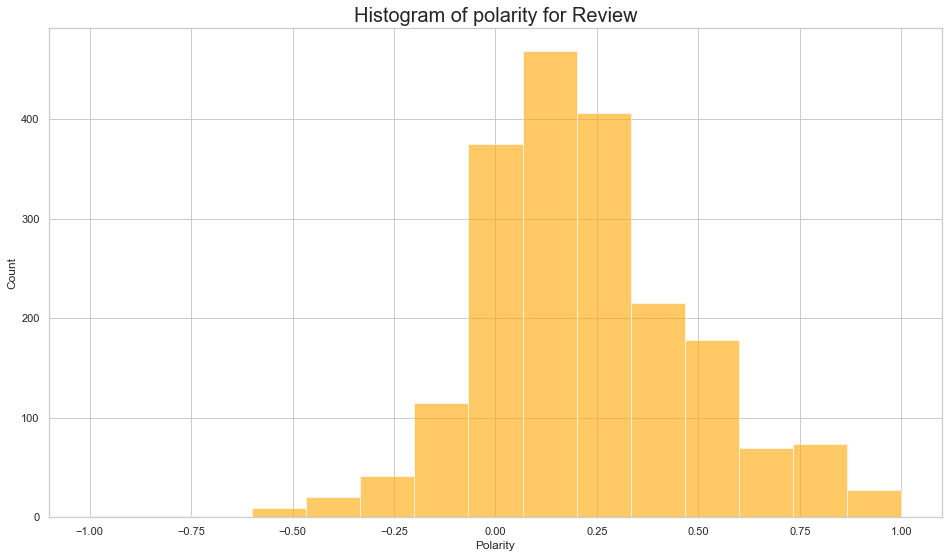

In [105]:
# Review: Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_online['polarity_review'], num_bins, facecolor='orange', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity for Review', fontsize=20)

plt.show();

>***Observations:***<br>
In reviews. the polarity is highly neutral and detects more positive trend.

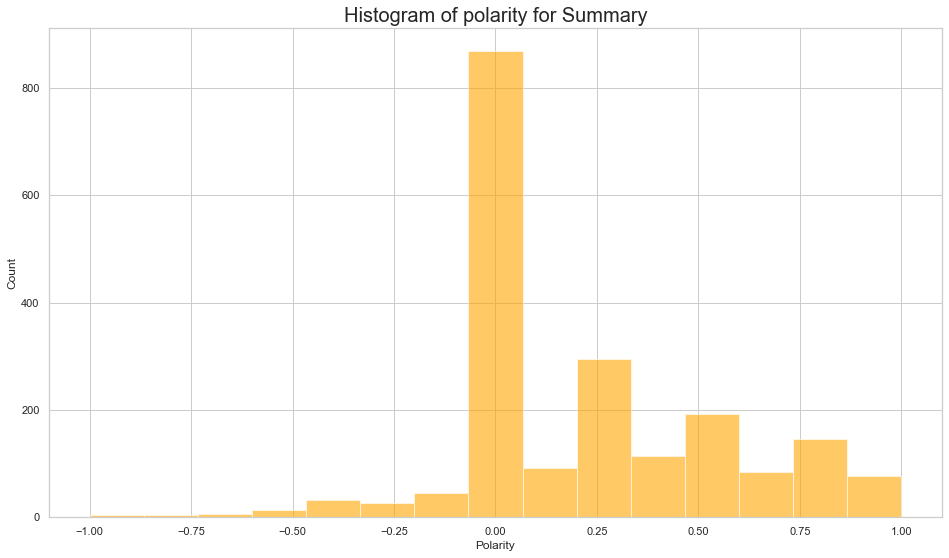

In [106]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_online['polarity_summary'], num_bins, facecolor='orange', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity for Summary', fontsize=20)

plt.show();

>***Observations:***<br>
In summary, the polarity is highly neutral, more positive than negative.

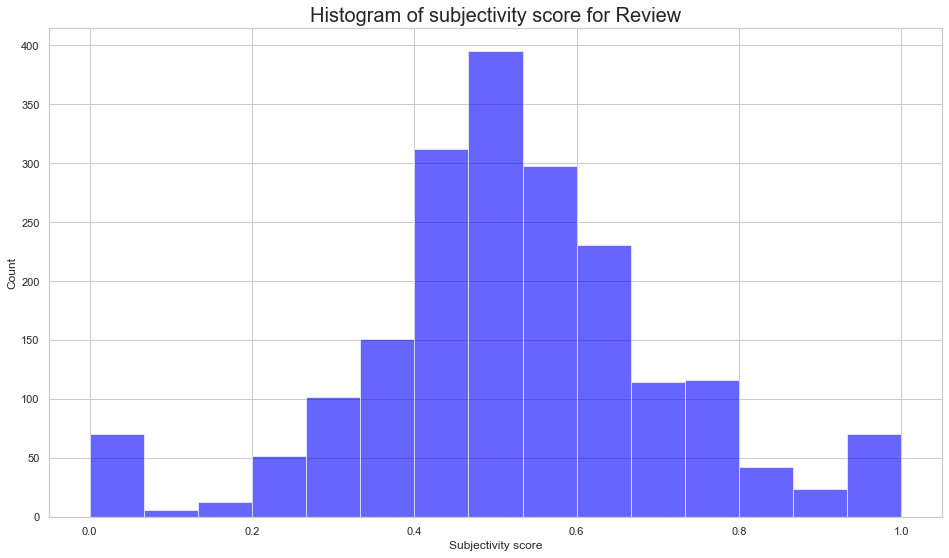

In [107]:
# Review: Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_online['subjectivity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for Review', fontsize=20)

plt.show();

>***Observations:***<br>
The subjectivity score of review is fairly evenly distributed on both side of 0.5. This suggests detects more customers' opnions.

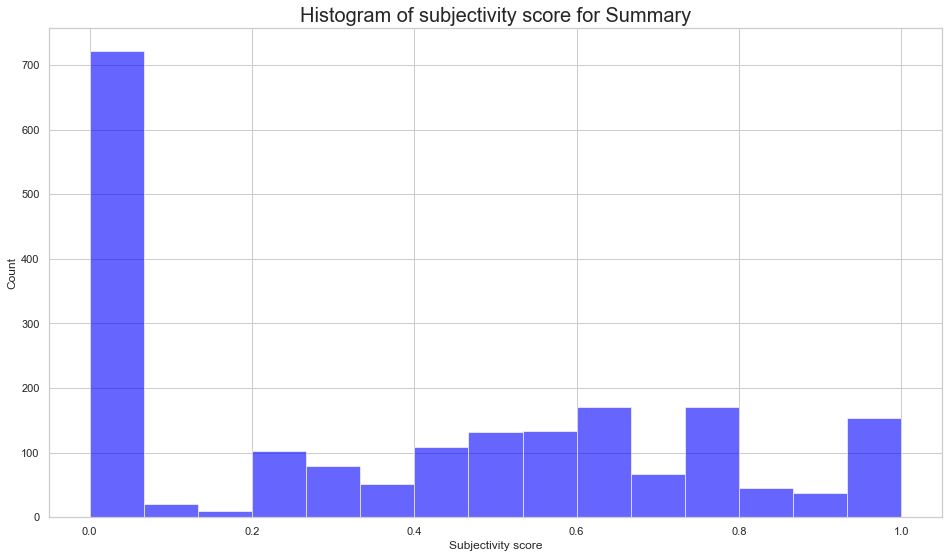

In [108]:
# Summary: Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df_online['subjectivity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of subjectivity score for Summary', fontsize=20)

plt.show();

>***Observations:***<br>
In summaries, the subjectivity score is rather low. A high 0 counts suggest most summaries are factual. Summaries do not detect much customers' opinions.

## 6. Identify top 20 positive and negative reviews and summaries respectively

## Top 20 negative reviews

In [109]:
# Top 20 negative reviews.
negative_review = df_online.nsmallest(20, 'polarity_review')
negative_review = negative_review[['review',  'polarity_review']]

# View output.
negative_review.style.set_properties(subset=['review'], **{'width':'1200px'})

## Top 20 negative summaries

In [110]:
# Top 20 negative summaries.
negative_sentiment_summary = df_online.nsmallest(20, 'polarity_summary')
negative_summary = negative_sentiment_summary[['summary',  'polarity_summary']]

# View output.
negative_summary.style.set_properties(subset=['summary'], **{'width':'1200px'})

## Top 20 positive reviews

In [111]:
# Top 20 positive reviews.
positive_review = df_online.nlargest(20, 'polarity_review')
positive_review = positive_review[['review',  'polarity_review']]

# View output
positive_review.style.set_properties(subset=['review'], **{'width': '1200px'})

## Top 20 positive summaries

In [112]:
# Top 20 positive summaries.
positive_summary = df_online.nlargest(20, 'polarity_summary')
positive_summary = positive_summary[['summary',  'polarity_summary']]

# View output
positive_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Insights and observations

The polarity of the reviews and summaries are highly neutral. It detects more positive trends in customers' opinions in both.
Subjectivity scores are very different. With summaries, it captures minimal opinions and possibly more factual. With reviews, it detects more higher than average opinions. This suggests that the sentiment captured in reviews could be very useful to understand customers'sentiment.